# Data Analysis


### DATA EXPLORATION

Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:

Calculate the total number of customers in each section

Calculate the total number of customers in each section over time

Display the number of customers at checkout over time

Calculate the time each customer spent in the market

Calculate the total number of customers in the supermarket over time.

Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).


In [223]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


folder_path = "./data/"

combined_df = pd.DataFrame()
largest_no = 0

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep=';')
        
        name_file =os.path.splitext(filename)[0]
        df['day_of_week']=name_file
        
        if largest_no > 0: 
            df['customer_no']= df['customer_no']+largest_no        
        combined_df = pd.concat([combined_df, df], ignore_index=True) 
        largest_no = combined_df['customer_no'].max()

combined_df

,timestamp,customer_no,location,day_of_week
0,2019-09-03 07:02:00,1,fruit,tuesday
1,2019-09-03 07:02:00,2,drinks,tuesday
2,2019-09-03 07:03:00,3,dairy,tuesday
3,2019-09-03 07:05:00,1,drinks,tuesday
4,2019-09-03 07:06:00,4,dairy,tuesday
...,...,...,...,...
24872,2019-09-06 21:50:00,7435,dairy,friday
24873,2019-09-06 21:50:00,7442,checkout,friday
24874,2019-09-06 21:50:00,7443,checkout,friday
24875,2019-09-06 21:50:00,7444,drinks,friday


In [224]:
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
combined_df['year'] = combined_df['timestamp'].dt.year
combined_df['month'] = combined_df['timestamp'].dt.month
combined_df['day'] = combined_df['timestamp'].dt.day
combined_df['hour'] = combined_df['timestamp'].dt.hour
combined_df['minute'] = combined_df['timestamp'].dt.minute
combined_df['day_of_week'] = pd.Categorical(combined_df['day_of_week'], ordered=True, categories=['monday', 'tuesday', 'wednesday', 'thursday', 'friday'])


In [225]:
no_checkout_customers = combined_df.loc[~combined_df['customer_no'].isin(combined_df.loc[combined_df['location'] == 'checkout', 'customer_no']), 'customer_no'].unique()
no_checkout_customers

array([1411, 1422, 2852, 2855, 2859, 2861, 2862, 2863, 2865, 2867, 2868,
       2869, 4396, 4401, 4402, 5924, 5931, 5932, 5933, 5934, 7429, 7431,
       7435, 7438, 7440, 7441, 7444, 7445])

In [227]:
#Adding extra rows for non-'checkout' containing customer_no
rows_to_add = pd.DataFrame(columns=combined_df.columns)
for customer in no_checkout_customers:
    last_timestamp = combined_df.loc[(combined_df['customer_no'] == customer), 'timestamp'].max()
    print(last_timestamp)
    day_of_week = combined_df.loc[(combined_df['customer_no'] == customer), 'day_of_week'].max()

    new_row = {'timestamp': last_timestamp, 'customer_no': customer, 'location': 'checkout', 'day_of_week': day_of_week}
    print(new_row)
    rows_to_add = rows_to_add.append(new_row, ignore_index=True)

final_df = pd.concat([combined_df, rows_to_add], ignore_index=True)
final_df

2019-09-03 21:50:00
{'timestamp': Timestamp('2019-09-03 21:50:00'), 'customer_no': 1411, 'location': 'checkout', 'day_of_week': 'tuesday'}
2019-09-03 21:47:00
{'timestamp': Timestamp('2019-09-03 21:47:00'), 'customer_no': 1422, 'location': 'checkout', 'day_of_week': 'tuesday'}
2019-09-02 21:49:00
{'timestamp': Timestamp('2019-09-02 21:49:00'), 'customer_no': 2852, 'location': 'checkout', 'day_of_week': 'monday'}
2019-09-02 21:49:00
{'timestamp': Timestamp('2019-09-02 21:49:00'), 'customer_no': 2855, 'location': 'checkout', 'day_of_week': 'monday'}
2019-09-02 21:47:00
{'timestamp': Timestamp('2019-09-02 21:47:00'), 'customer_no': 2859, 'location': 'checkout', 'day_of_week': 'monday'}
2019-09-02 21:46:00
{'timestamp': Timestamp('2019-09-02 21:46:00'), 'customer_no': 2861, 'location': 'checkout', 'day_of_week': 'monday'}
2019-09-02 21:49:00
{'timestamp': Timestamp('2019-09-02 21:49:00'), 'customer_no': 2862, 'location': 'checkout', 'day_of_week': 'monday'}
2019-09-02 21:49:00
{'timestamp'

/var/folders/0p/clc57n8j74z930884d20xxb00000gn/T/ipykernel_44143/2857658996.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rows_to_add = rows_to_add.append(new_row, ignore_index=True)
/var/folders/0p/clc57n8j74z930884d20xxb00000gn/T/ipykernel_44143/2857658996.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rows_to_add = rows_to_add.append(new_row, ignore_index=True)
/var/folders/0p/clc57n8j74z930884d20xxb00000gn/T/ipykernel_44143/2857658996.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rows_to_add = rows_to_add.append(new_row, ignore_index=True)
/var/folders/0p/clc57n8j74z930884d20xxb00000gn/T/ipykernel_44143/2857658996.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pa

,timestamp,customer_no,location,day_of_week,year,month,day,hour,minute
0,2019-09-03 07:02:00,1,fruit,tuesday,2019,9,3,7,2
1,2019-09-03 07:02:00,2,drinks,tuesday,2019,9,3,7,2
2,2019-09-03 07:03:00,3,dairy,tuesday,2019,9,3,7,3
3,2019-09-03 07:05:00,1,drinks,tuesday,2019,9,3,7,5
4,2019-09-03 07:06:00,4,dairy,tuesday,2019,9,3,7,6
...,...,...,...,...,...,...,...,...,...
24900,2019-09-06 21:49:00,7438,checkout,friday,NaN,NaN,NaN,NaN,NaN
24901,2019-09-06 21:49:00,7440,checkout,friday,NaN,NaN,NaN,NaN,NaN
24902,2019-09-06 21:48:00,7441,checkout,friday,NaN,NaN,NaN,NaN,NaN
24903,2019-09-06 21:50:00,7444,checkout,friday,NaN,NaN,NaN,NaN,NaN


In [228]:
mydata=final_df
mydata.set_index('timestamp', inplace=True)
mydata

,customer_no,location,day_of_week,year,month,day,hour,minute
timestamp,,,,,,,,
2019-09-03 07:02:00,1,fruit,tuesday,2019,9,3,7,2
2019-09-03 07:02:00,2,drinks,tuesday,2019,9,3,7,2
2019-09-03 07:03:00,3,dairy,tuesday,2019,9,3,7,3
2019-09-03 07:05:00,1,drinks,tuesday,2019,9,3,7,5
2019-09-03 07:06:00,4,dairy,tuesday,2019,9,3,7,6
...,...,...,...,...,...,...,...,...
2019-09-06 21:49:00,7438,checkout,friday,NaN,NaN,NaN,NaN,NaN
2019-09-06 21:49:00,7440,checkout,friday,NaN,NaN,NaN,NaN,NaN
2019-09-06 21:48:00,7441,checkout,friday,NaN,NaN,NaN,NaN,NaN


In [229]:
perminute = mydata.groupby(['customer_no', 'day']).resample('1Min').ffill()
perminute

customer_no  location day_of_week  year  \
customer_no day timestamp                                                     
1           3   2019-09-03 07:02:00           1     fruit     tuesday  2019   
                2019-09-03 07:03:00           1     fruit     tuesday  2019   
                2019-09-03 07:04:00           1     fruit     tuesday  2019   
                2019-09-03 07:05:00           1    drinks     tuesday  2019   
                2019-09-03 07:06:00           1    drinks     tuesday  2019   
...                                         ...       ...         ...   ...   
7443        6   2019-09-06 21:48:00        7443     dairy      friday  2019   
                2019-09-06 21:49:00        7443     dairy      friday  2019   
                2019-09-06 21:50:00        7443  checkout      friday  2019   
7444        6   2019-09-06 21:50:00        7444    drinks      friday  2019   
7445        6   2019-09-06 21:50:00        7445    spices      friday  2019   

                                    month day hour minute  
customer_no day timestamp                                  
1           3   2019-09-03 07:02:00     9   3    7      2  
                2019-09-03 07:03:00     9   3    7      2  
                2019-09-03 07:04:00     9   3    7      2  
                2019-09-03 07:05:00     9   3    7      5  
                2019-09-03 07:06:00     9   3    7      5  
...                                   ...  ..  ...    ...  
7443        6   2019-09-06 21:48:00     9   6   21     48  
                2019-09-06 21:49:00     9   6   21     48  
                2019-09-06 21:50:00     9   6   21     50  
7444        6   2019-09-06 21:50:00     9   6   21     50  
7445        6   2019-09-06 21:50:00     9   6   21     50  

[53903 rows x 8 columns]

In [230]:
perminute['from'] = perminute['location'].shift(1)
perminute.fillna('checkout', inplace=True)
perminute


customer_no  location day_of_week  year  \
customer_no day timestamp                                                      
1           3   2019-09-03 07:02:00            1     fruit     tuesday  2019   
                2019-09-03 07:03:00            1     fruit     tuesday  2019   
                2019-09-03 07:04:00            1     fruit     tuesday  2019   
                2019-09-03 07:05:00            1    drinks     tuesday  2019   
                2019-09-03 07:06:00            1    drinks     tuesday  2019   
...                                          ...       ...         ...   ...   
7443        6   2019-09-06 21:48:00         7443     dairy      friday  2019   
                2019-09-06 21:49:00         7443     dairy      friday  2019   
                2019-09-06 21:50:00         7443  checkout      friday  2019   
7444        6   2019-09-06 21:50:00         7444    drinks      friday  2019   
7445        6   2019-09-06 21:50:00         7445    spices      friday  2019   

                                     month  day  hour  minute      from  
customer_no day timestamp                                                
1           3   2019-09-03 07:02:00      9    3     7       2  checkout  
                2019-09-03 07:03:00      9    3     7       2     fruit  
                2019-09-03 07:04:00      9    3     7       2     fruit  
                2019-09-03 07:05:00      9    3     7       5     fruit  
                2019-09-03 07:06:00      9    3     7       5    drinks  
...                                    ...  ...   ...     ...       ...  
7443        6   2019-09-06 21:48:00      9    6    21      48  checkout  
                2019-09-06 21:49:00      9    6    21      48     dairy  
                2019-09-06 21:50:00      9    6    21      50     dairy  
7444        6   2019-09-06 21:50:00      9    6    21      50  checkout  
7445        6   2019-09-06 21:50:00      9    6    21      50    drinks  

[53903 rows x 9 columns]

In [231]:
tm = pd.crosstab(perminute['from'], perminute['location'], normalize='index')
tm

location,checkout,dairy,drinks,fruit,spices
from,,,,,
checkout,0.000000,0.287409,0.153276,0.377730,0.181585
dairy,0.102678,0.737144,0.058625,0.050073,0.051480
drinks,0.215505,0.010899,0.598499,0.088012,0.087086
fruit,0.201054,0.095924,0.055241,0.597104,0.050677
spices,0.149912,0.193564,0.163135,0.091126,0.402262


In [232]:
tm.rename({'checkout': 'entry'}, inplace=True)

<Axes: xlabel='day_of_week', ylabel='customer_no_count'>

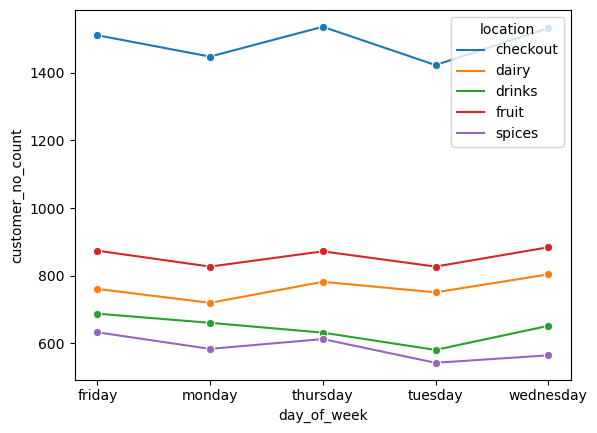

In [233]:
#grouped= mydata.groupby(['location', 'day_of_week', 'hour', 'minute'])['customer_no'].unique()
grouped = mydata.groupby(['location', 'day_of_week'])['customer_no'].unique().reset_index()
grouped['customer_no_count'] = grouped['customer_no'].apply(len)
#plt.figure(figsize=(200, 50))

sns.lineplot(data=grouped, x='day_of_week', y='customer_no_count', hue='location', marker='o', color=color_palette.colors)


#plt.figure(figsize=(12, 6))


#plt.plot(grouped['hour', 'minute'], grouped['customer_no'].count(), marker='o')




In [179]:
customer_counts_time = perminute.groupby(['location'])['customer_no'].unique().count()
#customer_counts_time = customer_counts_time.reset_index()
#print(customer_counts_time)

sns.lineplot(data=customer_counts_time, x='day_of_week', y='customer_no', hue='location', marker='o', color=color_palette.colors)

#customer_counts_time = customer_counts_time.sort_values(['day', 'hour', 'min' 'location'])
sns.lineplot(data=customer_counts_time, x='day_of_week', y='customer_no', hue='location',marker='o', color=color_palette.colors)
plt.xlabel('Days of the Week')
plt.ylabel('Customer Count')
plt.title('Customer Count by Location and Day of the Week')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `day_of_week` for parameter `x`

2.Calculate the total number of customers in each section over time
3. Display the number of customers at checkout over time

2.Calculate the total number of customers in each section over time
3. Display the number of customers at checkout over time

2.Calculate the total number of customers in each section over time
3. Display the number of customers at checkout over time

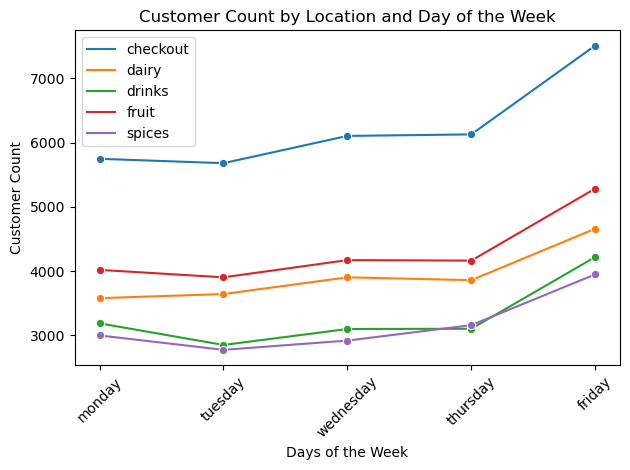

In [57]:
customer_counts_time = dfs.groupby(['location','day_of_week'])['customer_no'].count()
customer_counts_time = customer_counts_time.reset_index()
#print(customer_counts_time)

customer_counts_time = customer_counts_time.sort_values(['day_of_week', 'location'])
sns.lineplot(data=customer_counts_time, x='day_of_week', y='customer_no', hue='location', marker='o', color=color_palette.colors)
plt.xlabel('Days of the Week')
plt.ylabel('Customer Count')
plt.title('Customer Count by Location and Day of the Week')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

4. Calculate the time each customer spent in the market

Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).